##Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.exceptions import ConvergenceWarning
import warnings


## Importing Data

In [3]:
data = pd.read_csv('wineq.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Algorithm Selection

In [4]:

models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]


## Cross-Validation and Model Evaluation

In [5]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
results = {}
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores

## Statistical Tests

In [6]:
comparisons = []
for i, (name1, _) in enumerate(models):
    for j, (name2, _) in enumerate(models):
        if i < j:
            p_value = stats.ttest_rel(results[name1], results[name2]).pvalue
            comparisons.append((name1, name2, p_value))

## Model Selection

In [7]:
alpha = 0.01  # Set your significance level
selected_algorithms = [name for name, _ in models if all(p >= alpha for _, _, p in comparisons if _ == name)]

## Final Selection

In [8]:
final_scores = {}
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    final_scores[name] = accuracy

best_model = max(final_scores, key=final_scores.get)
for name, accuracy in final_scores.items():
    print(f"{name} Accuracy: {accuracy}")
print("Selected Algorithms:", selected_algorithms)
print("Best Model:", best_model, final_scores[best_model])



Random Forest Accuracy: 0.728125
SVM Accuracy: 0.503125
Logistic Regression Accuracy: 0.63125
Decision Tree Accuracy: 0.64375
Selected Algorithms: ['Random Forest']
Best Model: Random Forest 0.728125


## Visualization

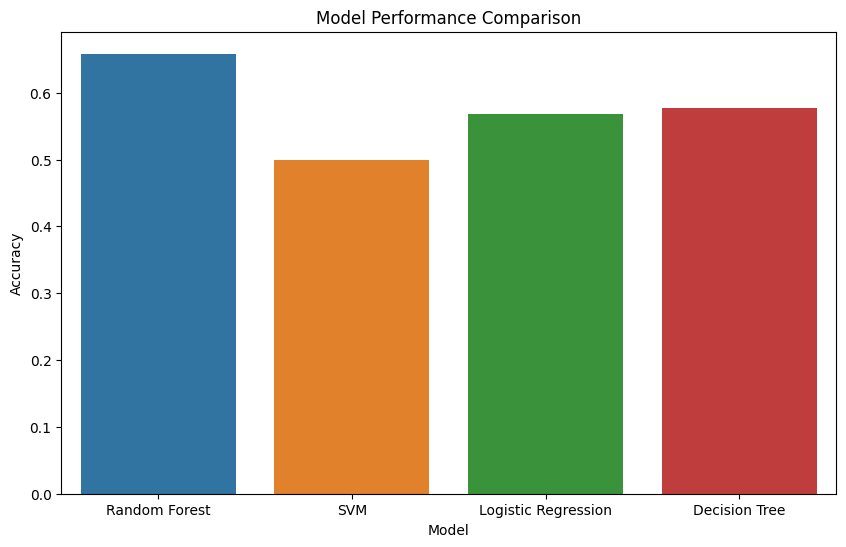

In [14]:
plt.figure(figsize=(10, 6))
df_results = pd.DataFrame(results)
sns.barplot(data=df_results.mean().reset_index(), x='index', y=0)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()